# Pymaceuticals Inc.
---


# Observations and Inferences

1. **Capomulin Effectiveness:**
   - The Capomulin regimen appears to be effective in reducing tumor volume over time. This is evident from the line plot showing a general downward trend in tumor volume for mice treated with Capomulin.

2. **Correlation Between Weight and Tumor Volume:**
   - There is a positive correlation between mouse weight and tumor volume for the Capomulin regimen. The average tumor volume is 0.84 showing that heavier mice tend to have larger tumors.

3. **Consistency of Capomulin and Ramicane:**
   - The variance in tumor volume is lower for the Capomulin and Ramicane regimens compared to other treatment regimens. This suggests that these treatments may be more consistent in their effects.
 

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.info()
study_results.info()    

# Combine the data into a single DataFrame
merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [114]:
# Checking the number of mice.
mice = merged["Mouse ID"].nunique()
mice


249

In [115]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged.loc[merged.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [116]:
# Optional: Get all the data for the duplicate mouse ID.

duplicates_data = merged.loc[merged["Mouse ID"] == "g989"]
duplicates_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [117]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = merged[merged["Mouse ID"].isin(duplicates) == False]
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [118]:
# Checking the number of mice in the clean DataFrame.
mice_clean = clean["Mouse ID"].nunique()
mice_clean

248

## Summary Statistics

In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_grouped = clean.groupby("Drug Regimen")   
tumor_mean = clean_grouped["Tumor Volume (mm3)"].mean()
tumor_median = clean_grouped["Tumor Volume (mm3)"].median()
tumor_var = clean_grouped["Tumor Volume (mm3)"].var()   
tumor_std = clean_grouped["Tumor Volume (mm3)"].std()
tumor_sem = clean_grouped["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame({"Mean": tumor_mean, "Median": tumor_median, "Variance": tumor_var, "Standard Deviation": tumor_std, "SEM": tumor_sem})


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [120]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_agg = clean_grouped.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

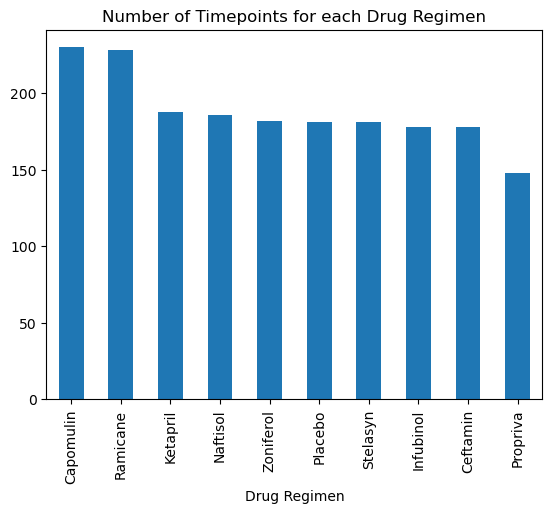

In [121]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pd_bar = clean["Drug Regimen"].value_counts().plot(kind="bar", title="Number of Timepoints for each Drug Regimen")

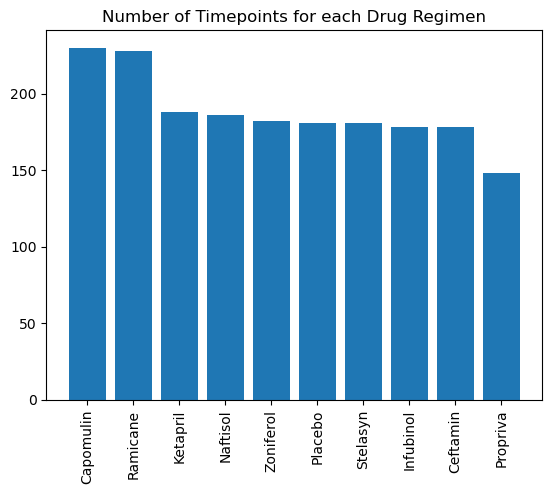

In [122]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = clean["Drug Regimen"].value_counts().index
y_axis = clean["Drug Regimen"].value_counts().values
plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.title("Number of Timepoints for each Drug Regimen")
plt.show()


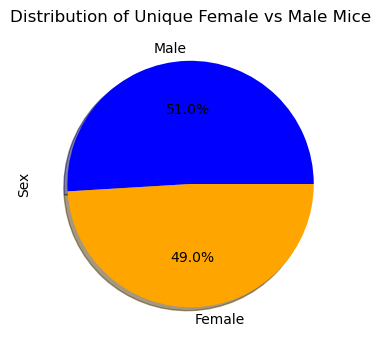

In [123]:
# Get the unique counts of each gender
gender_counts = clean["Sex"].value_counts()

# Extract sizes and labels
sizes = gender_counts.values
labels = gender_counts.index.tolist()

# Define colors
colors = ['blue', 'orange']

# Create the pie chart using plt.pie
plt.figure(figsize=(5, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('Sex')
plt.show()

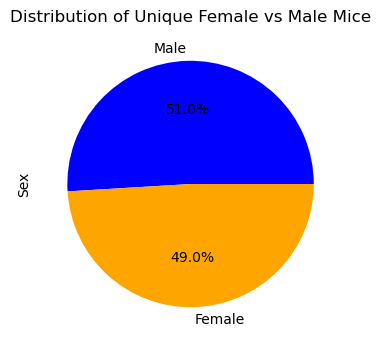

In [124]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

gender = clean["Sex"].value_counts()


# Get the unique mice with their gender
gender_counts = clean["Sex"].value_counts()

# Make the pie chart
plt.figure(figsize=(5, 4))
gender_counts.plot.pie(autopct='%1.1f%%', colors=['blue','orange'])
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('Sex')  
plt.show()


## Quartiles, Outliers and Boxplots

In [125]:
clean.head()    


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [126]:
capomulin = clean.loc[clean["Drug Regimen"] == "Capomulin", :]
ramicane = clean.loc[clean["Drug Regimen"] == "Ramicane", :]
infubinol = clean.loc[clean["Drug Regimen"] == "Infubinol", :]
ceftamin = clean.loc[clean["Drug Regimen"] == "Ceftamin", :]

capomulin.head()
ramicane.head()
infubinol.head()
ceftamin.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1


In [127]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
tumor_volume = clean.groupby(["Mouse ID"]).last()
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_volume = tumor_volume.loc[(tumor_volume["Drug Regimen"] == "Capomulin") | 
                                (tumor_volume["Drug Regimen"] == "Ramicane") | 
                                (tumor_volume["Drug Regimen"] == "Infubinol") | 
                                (tumor_volume["Drug Regimen"] == "Ceftamin")]
# Start by getting the last (greatest) timepoint for each mouse

capomulin_last = clean.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, clean, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge.head()
ramicane_last = clean.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, clean, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge.head()
infubinol_last = clean.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, clean, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge.head()
ceftamin_last = clean.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, clean, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge.head()


# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final = pd.merge(capomulin_merge, ramicane_merge, how = 'outer')
final = pd.merge(final, infubinol_merge, how = 'outer')
final = pd.merge(final, ceftamin_merge, how = 'outer')
final



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [128]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final.loc[final["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    # add subset
    tumor_vol_data.append(final_tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


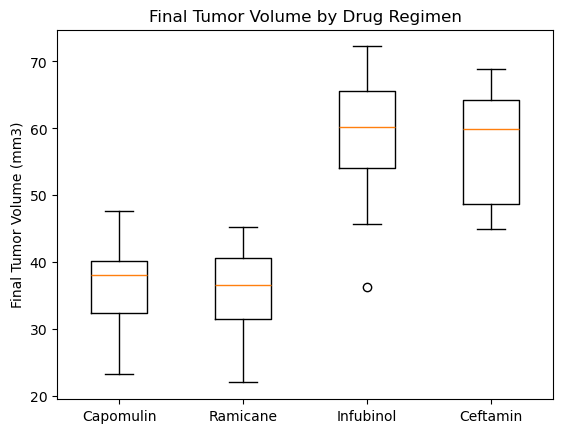

In [129]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels = treatments)
plt.title("Final Tumor Volume by Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

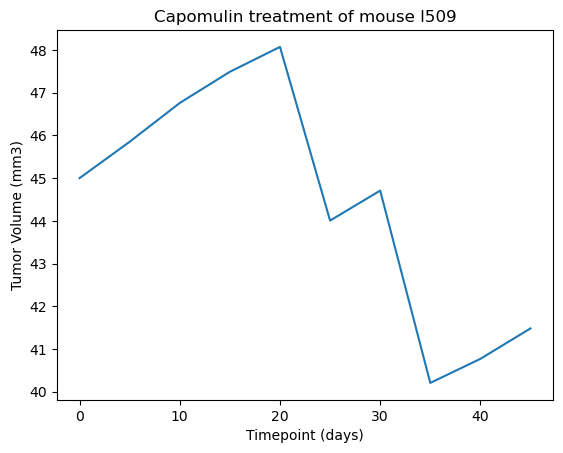

In [130]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean.loc[clean["Drug Regimen"] == "Capomulin"]
mouse = capomulin.loc[capomulin["Mouse ID"] == "l509"]
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()


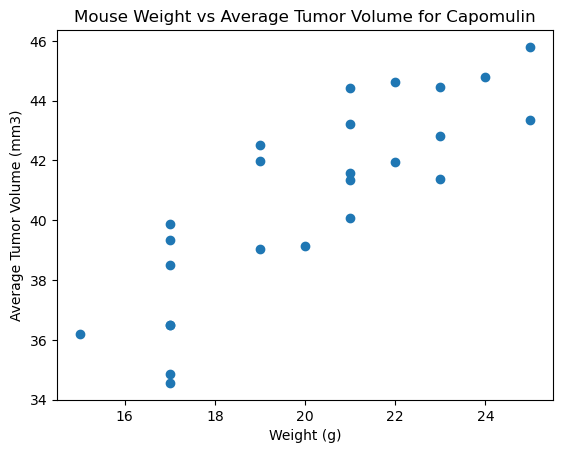

In [131]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = clean.loc[clean["Drug Regimen"] == "Capomulin"]


numeric_columns = capomulin.select_dtypes(include=['number'])


numeric_columns = capomulin[['Mouse ID']].join(numeric_columns)


capomulin_avg = numeric_columns.groupby("Mouse ID").mean()

plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")
plt.show()



## Correlation and Regression

In [132]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")




The correlation between mouse weight and average tumor volume is 0.84


The slope is: 0.9544396890241049
The intercept is: 21.552160532685008


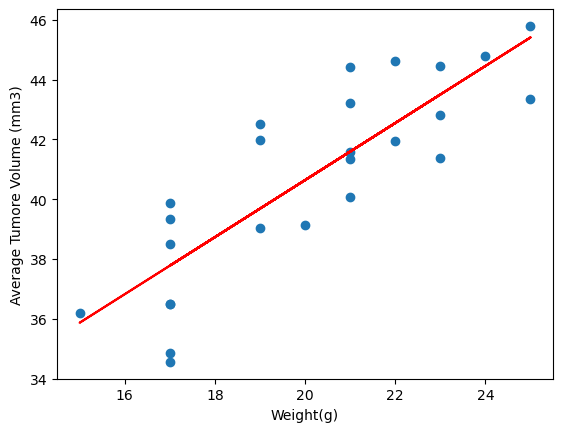

In [133]:
line = st.linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])

# Extract slope and intercept
slope = line.slope
intercept = line.intercept
print(f"The slope is: {slope}")
print(f"The intercept is: {intercept}")

y_values = capomulin_avg['Weight (g)']* slope+intercept
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()